# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
#Import Libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans   #<---- We will use sci-kit learns implementation of K-means
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
#Load the dataset
data = pd.read_csv("Wholesale_Data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
data.head(20)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [4]:
#get to understand data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
#Summary Statistics
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
#how many rows and columns are present in dataset
data.shape

(440, 8)

In [7]:
duplicate_rows = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 8)


There are no duplicate rows

In [8]:
#checking for null values
print(data.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [9]:
#check data types 
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

EDA Visualizations

DETECTING OUTLIERS

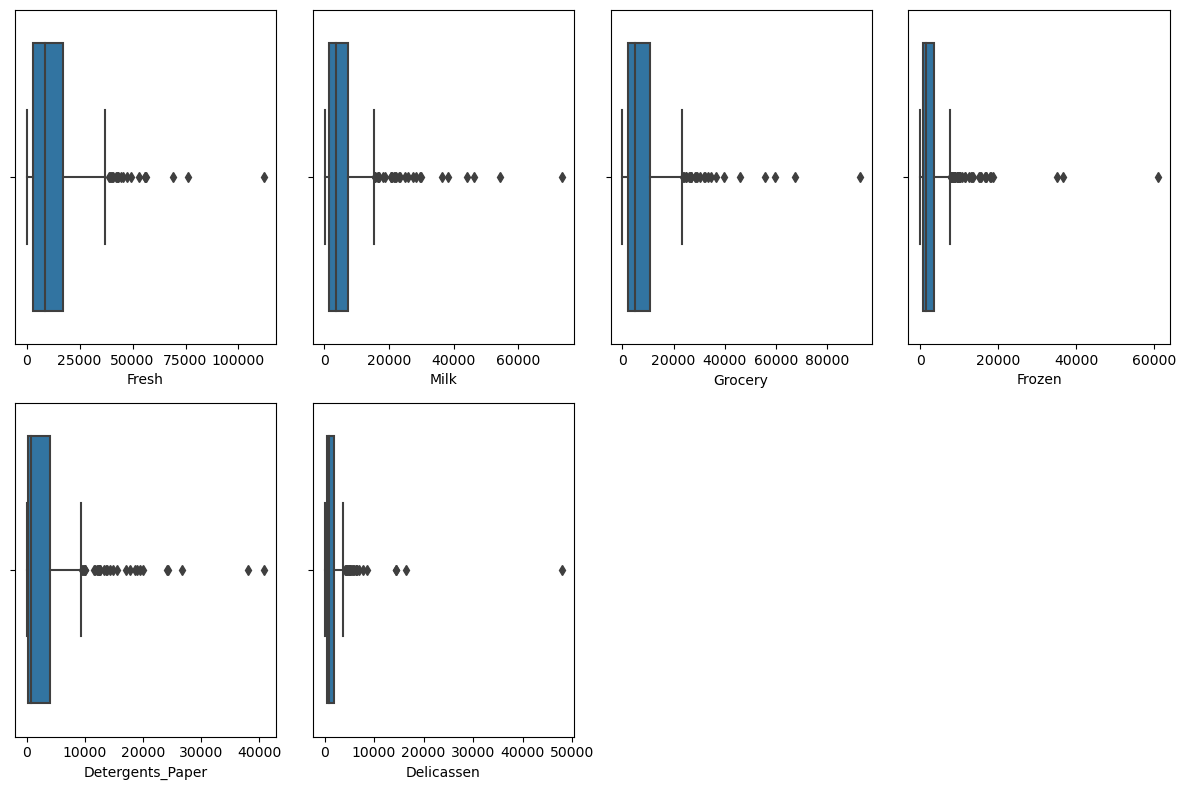

In [10]:
#check for outliers with boxplots
# Select the continuous features for box plot
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create box plots for each continuous feature to check for outliers
plt.figure(figsize=(12, 8))  # Set the size of the figure
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=data[feature])
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

This shows that the features contains outliers, also shows the need to reprocess the data in some ways. 

Distribution of Features using histogram

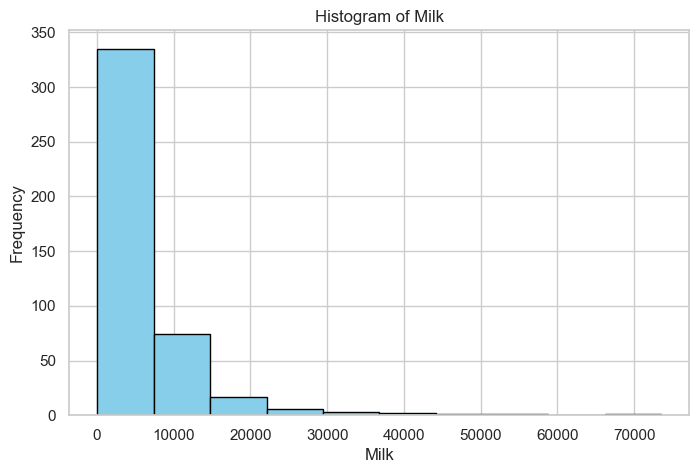

In [31]:
# Histogram for a single column Fresh
plt.figure(figsize=(8, 5))
plt.hist(data['Milk'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Milk')
plt.ylabel('Frequency')
plt.title('Histogram of Milk')
plt.show()

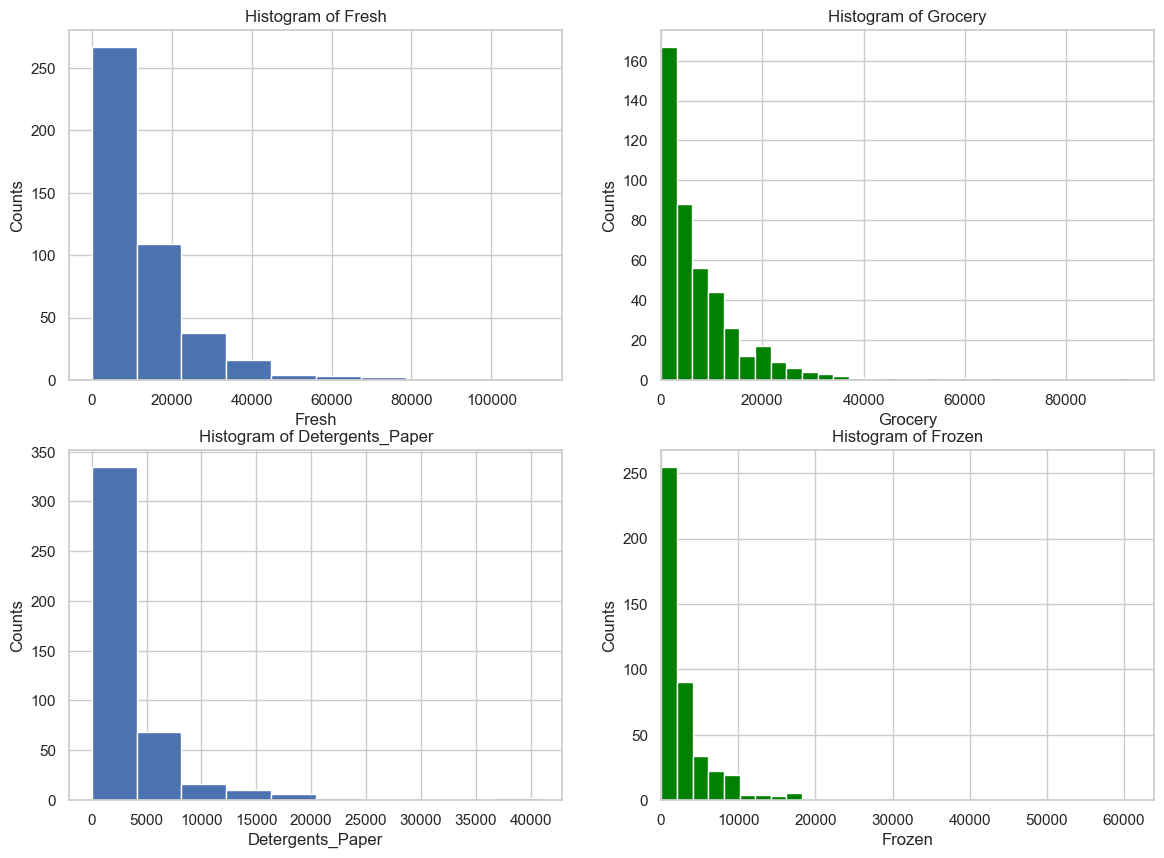

In [30]:
# Distribution of features

fig, axes = plt.subplots(nrows = 2,
                         ncols = 2,
                         figsize=(14, 10)        # units up to debate?
                        )

# Plot 0,0
axes[0,0].hist(data['Fresh'])
axes[0,0].set_title('Histogram of Fresh')
axes[0,0].set_xlabel('Fresh')
axes[0,0].set_ylabel('Counts')

# Plot 0,1
axes[0,1].hist(data['Grocery'], bins=30, color='green')
axes[0,1].set_title('Histogram of Grocery')
axes[0,1].set_xlabel('Grocery')
axes[0,1].set_ylabel('Counts')
axes[0,1].set_xlim(left=0)
#axes[0,1].set_xlim(right=0)

# Plot 1,0
axes[1,0].hist(data['Detergents_Paper'])
axes[1,0].set_title('Histogram of Detergents_Paper')
axes[1,0].set_xlabel('Detergents_Paper')
axes[1,0].set_ylabel('Counts')

# Plot 1,1
axes[1,1].hist(data['Frozen'], bins=30, color='green')
axes[1,1].set_title('Histogram of Frozen')
axes[1,1].set_xlabel('Frozen')
axes[1,1].set_ylabel('Counts')
axes[1,1].set_xlim(left=0)

plt.show()

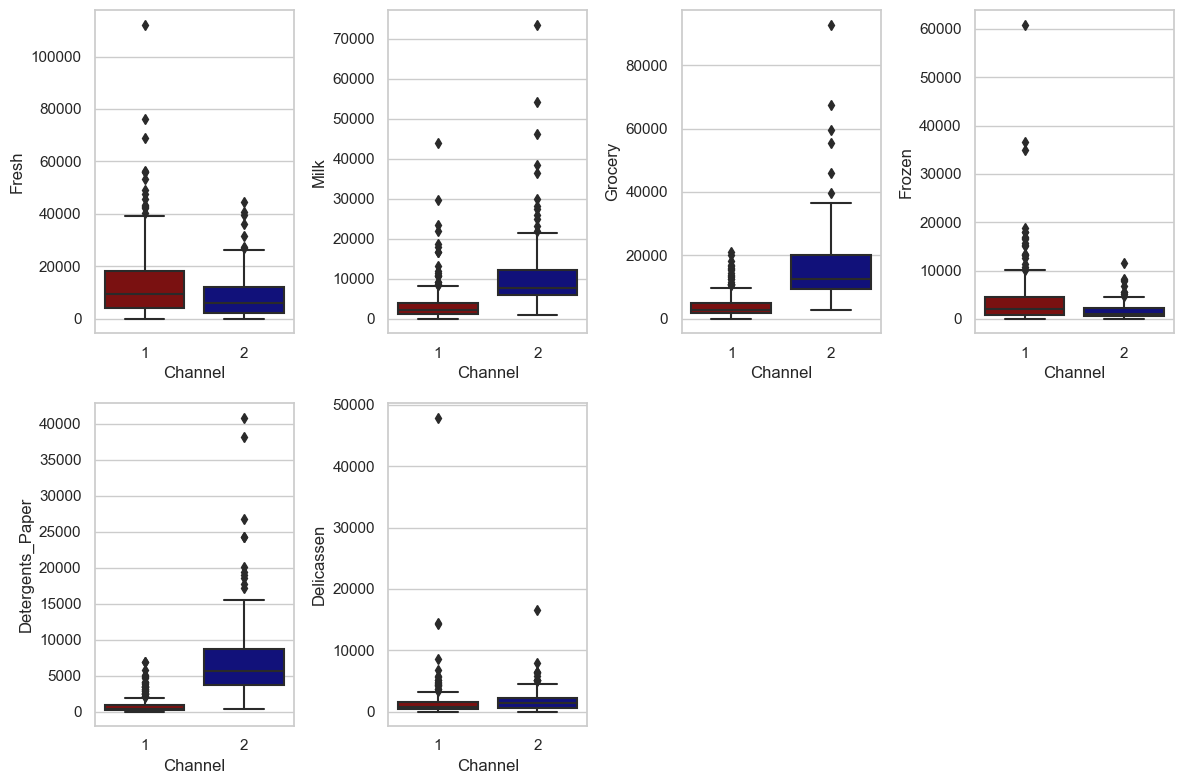

In [23]:
#distribution of predictor variable by channels
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create box plots to compare the distribution of continuous features for each Channel category
plt.figure(figsize=(12, 8))  # Set the size of the figure
sns.set(style="whitegrid")
colors = ['darkred', 'darkblue']
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='Channel', y=feature, data=data, palette=colors)
    plt.xlabel('Channel')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

Pairplot to view linearity and possible correlation between features

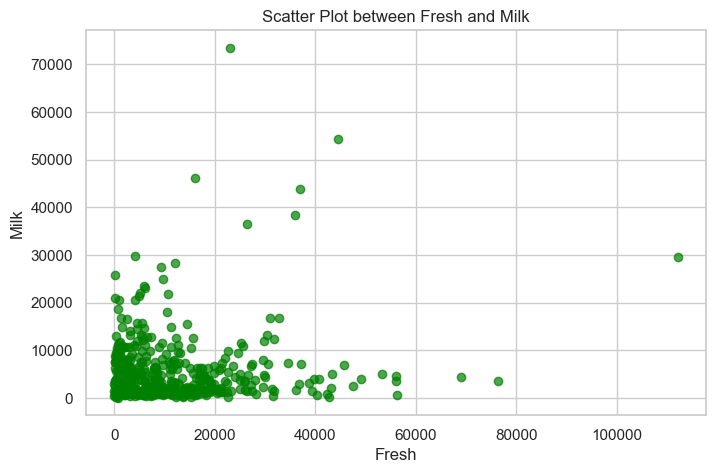

In [34]:
# Scatter plot to see the relationship between 'Fresh' and 'Milk'
plt.figure(figsize=(8, 5))
plt.scatter(data['Fresh'], data['Milk'], color='green', alpha=0.7)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Scatter Plot between Fresh and Milk')
plt.show()

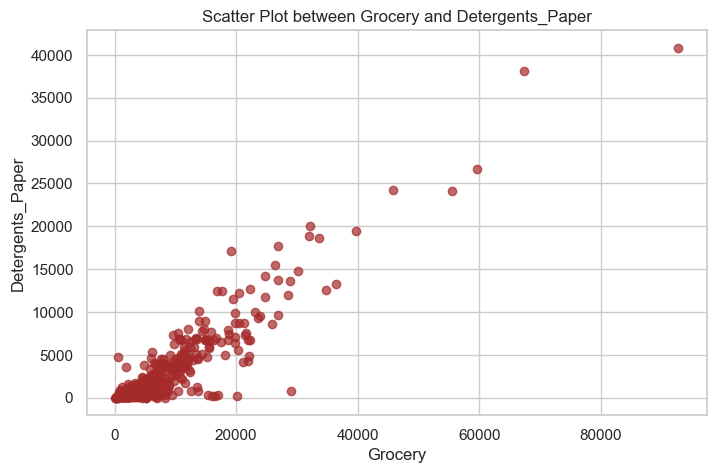

In [39]:
# Scatter plot to see the relationship between 'Grocery' and 'Detergents_Papers'
plt.figure(figsize=(8, 5))
plt.scatter(data['Grocery'], data['Detergents_Paper'], color='brown', alpha=0.7)
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.title('Scatter Plot between Grocery and Detergents_Paper')
plt.show()

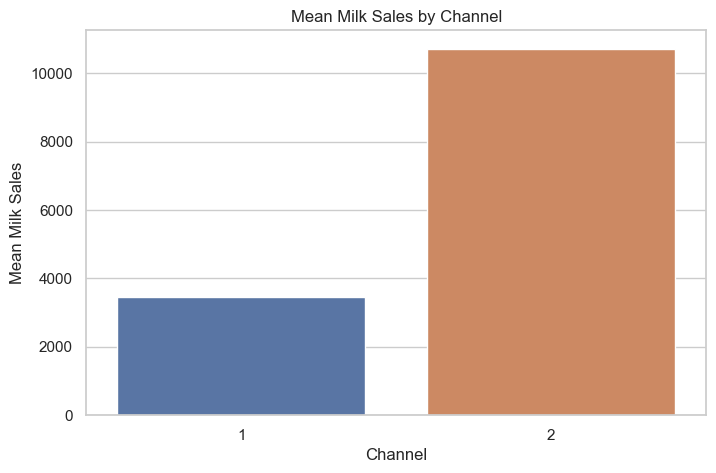

In [36]:
# Bar plot to visualize categorical data (e.g., Channel and Region)
plt.figure(figsize=(8, 5))
sns.barplot(x='Channel', y='Milk', data=data, ci=None)
plt.xlabel('Channel')
plt.ylabel('Mean Milk Sales')
plt.title('Mean Milk Sales by Channel')
plt.show()

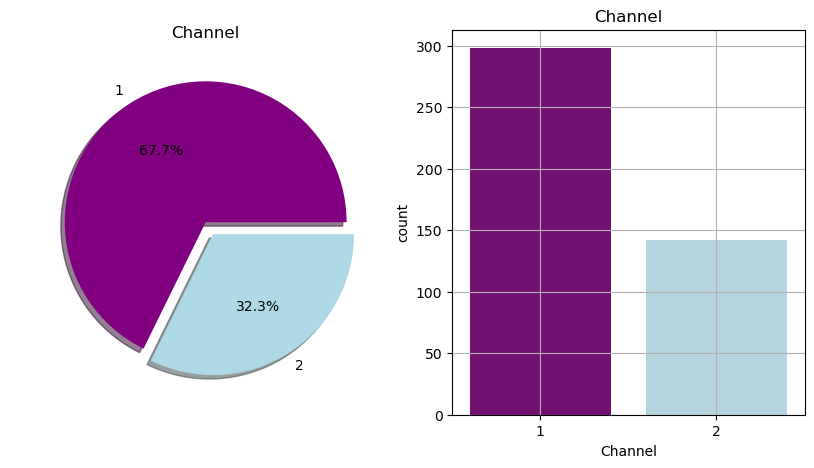

In [20]:

# Create subplots with 1 row and 2 columns
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Specify colors for the pie chart
colors = ['purple', 'lightblue']

# Plot a pie chart to show the proportion of each category in the 'channel' variable
data['Channel'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=colors)
ax[0].set_title('Channel')
ax[0].set_ylabel(" ")

# Specify a color palette for the bar plot
color_palette = ['purple', 'lightblue']

# Plot a bar plot to show the count of each category in the 'Channel' variable
sns.barplot(x=data['Channel'].value_counts().index, y=data['Channel'].value_counts(), ax=ax[1], palette=color_palette)
ax[1].set_title('Channel')

# Show the plots
plt.grid()
plt.show()


Analysing correlation between features

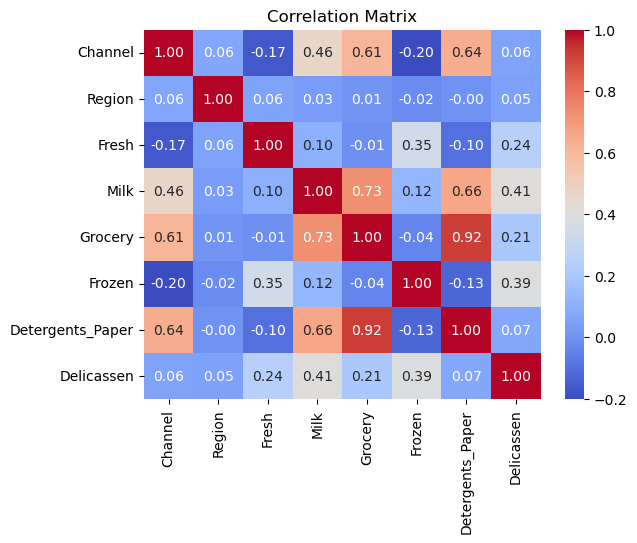

In [21]:
#check relationships between variables, using correclation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


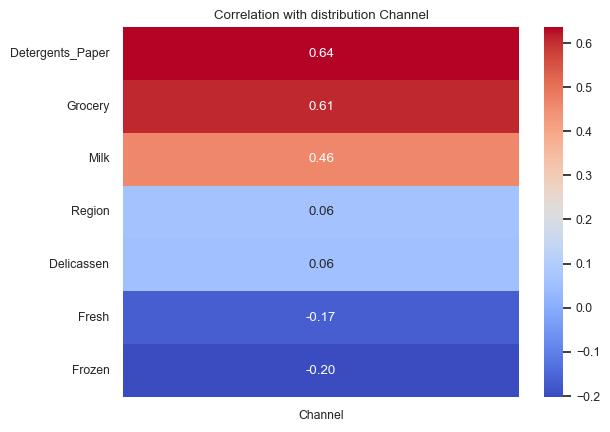

In [22]:
# Calculate the correlation between predictor variables and the outcome variable
corr = data.corr()
target_corr = corr['Channel'].drop('Channel')  # Drop the 'Outcome' row since it's the correlation with itself

# Sort the correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Set the style and color palette for the plot
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")

# Create a heatmap to visualize the correlation with the outcome variable
sns.heatmap(target_corr_sorted.to_frame(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation with distribution Channel')
plt.show()

preprocessing with standard scaler

In [42]:

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(data)

# Now you can create a DataFrame with the scaled data and check the summary statistics
scaled_data = pd.DataFrame(data_scaled, columns=data.columns)
print(scaled_data.describe())


            Channel        Region         Fresh        Milk       Grocery  \
count  4.400000e+02  4.400000e+02  4.400000e+02  440.000000  4.400000e+02   
mean   1.614870e-17  3.552714e-16 -3.431598e-17    0.000000 -4.037175e-17   
std    1.001138e+00  1.001138e+00  1.001138e+00    1.001138  1.001138e+00   
min   -6.902971e-01 -1.995342e+00 -9.496831e-01   -0.778795 -8.373344e-01   
25%   -6.902971e-01 -7.023369e-01 -7.023339e-01   -0.578306 -6.108364e-01   
50%   -6.902971e-01  5.906683e-01 -2.767602e-01   -0.294258 -3.366684e-01   
75%    1.448652e+00  5.906683e-01  3.905226e-01    0.189092  2.849105e-01   
max    1.448652e+00  5.906683e-01  7.927738e+00    9.183650  8.936528e+00   

             Frozen  Detergents_Paper    Delicassen  
count  4.400000e+02      4.400000e+02  4.400000e+02  
mean   3.633457e-17      2.422305e-17 -8.074349e-18  
std    1.001138e+00      1.001138e+00  1.001138e+00  
min   -6.283430e-01     -6.044165e-01 -5.402644e-01  
25%   -4.804306e-01     -5.511349e-0

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

DETERMINE OPTIMAL NUMBER OF CLUSTERS

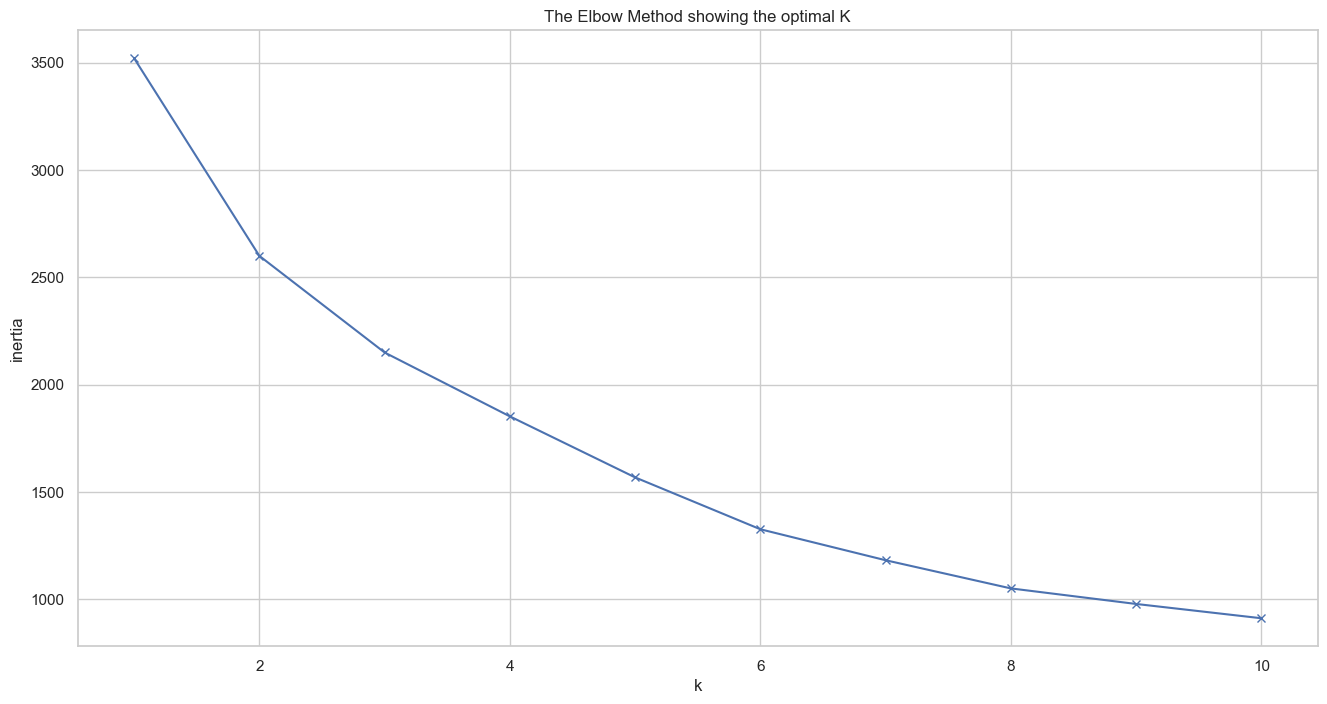

In [44]:
#Determine the Optimal Number of Clusters - Using Elbow Method
inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_data)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

This shows we could choose K as any number between 3 and 7
Use silhouettes method, just to compare and get more insight for what the optimal value of k could be

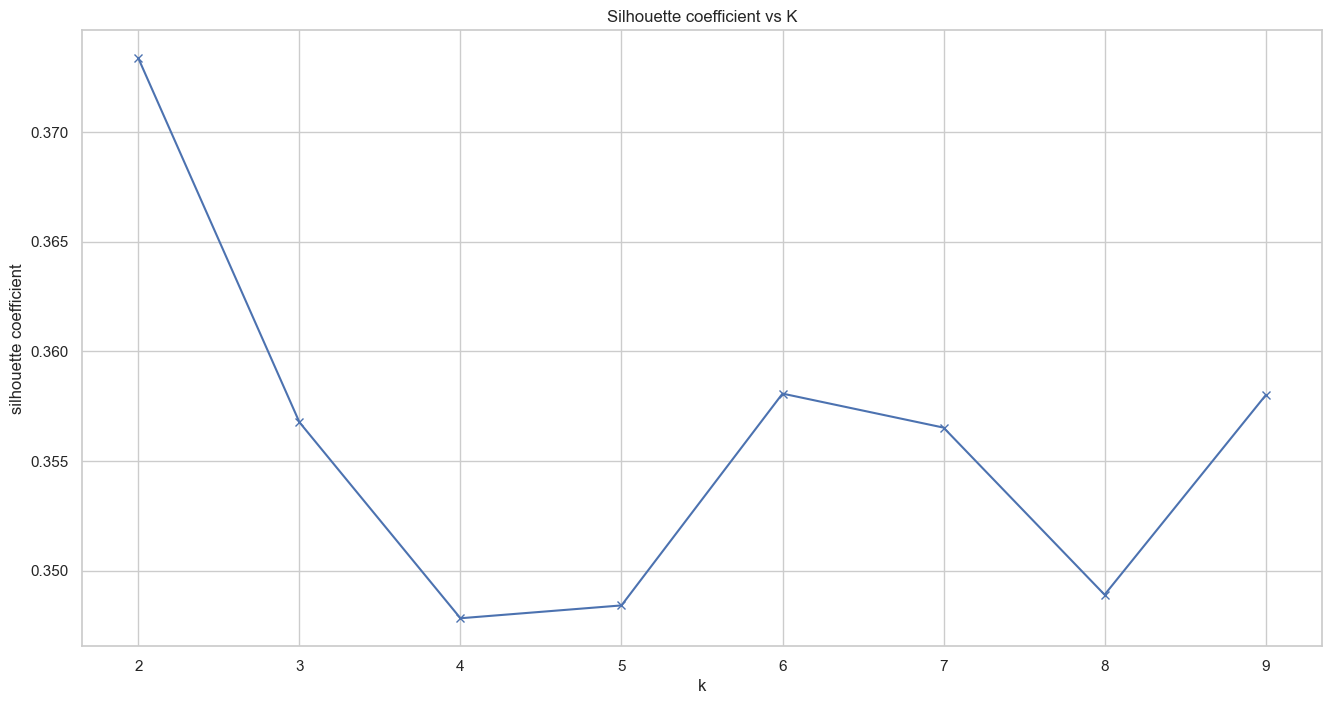

In [46]:
from sklearn.metrics import silhouette_score
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_data)
    label=kmeanModel.predict(scaled_data)
    silhouettes.append(silhouette_score(scaled_data,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [49]:
#finish off example by actually performing clustering
model = KMeans(n_clusters=4)
model.fit(scaled_data)  #Train the model

pred = model.predict(scaled_data)  #Make predictions

pred



array([3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1,
       1, 2, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3,
       3, 3, 3, 2, 3, 3, 1, 1, 3, 3, 1, 1, 2, 3, 1, 1, 3, 2, 3, 3, 1, 2,
       1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 2, 0, 0, 3, 0, 3, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 3, 0, 3,

In [51]:
scaled_data['pred'] = pred
print(scaled_data)

      Channel    Region     Fresh      Milk   Grocery    Frozen  \
0    1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1    1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2    1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3   -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4    1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   
..        ...       ...       ...       ...       ...       ...   
435 -0.690297  0.590668  1.401312  0.848446  0.850760  2.075222   
436 -0.690297  0.590668  2.155293 -0.592142 -0.757165  0.296561   
437  1.448652  0.590668  0.200326  1.314671  2.348386 -0.543380   
438 -0.690297  0.590668 -0.135384 -0.517536 -0.602514 -0.419441   
439 -0.690297  0.590668 -0.729307 -0.555924 -0.573227 -0.620094   

     Detergents_Paper  Delicassen  Cluster  pred  
0           -0.043569   -0.066339        0     3  
1            0.086407    0.089151        0     3  
2            0.133232    2.243293        0

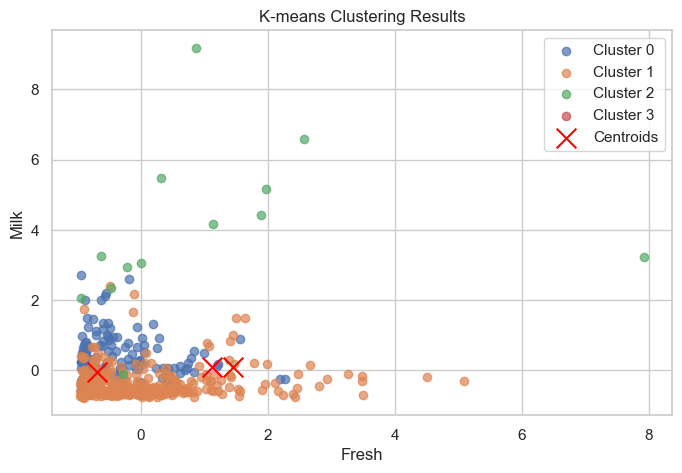

In [52]:
#Visualize the clustered data
plt.figure(figsize=(8, 5))
for cluster_num in range(4):
    cluster_points = scaled_data[scaled_data['Cluster'] == cluster_num]
    plt.scatter(cluster_points['Fresh'], cluster_points['Milk'], label=f'Cluster {cluster_num}', alpha=0.7)

# Plot centroids (optional)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroids')

plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()

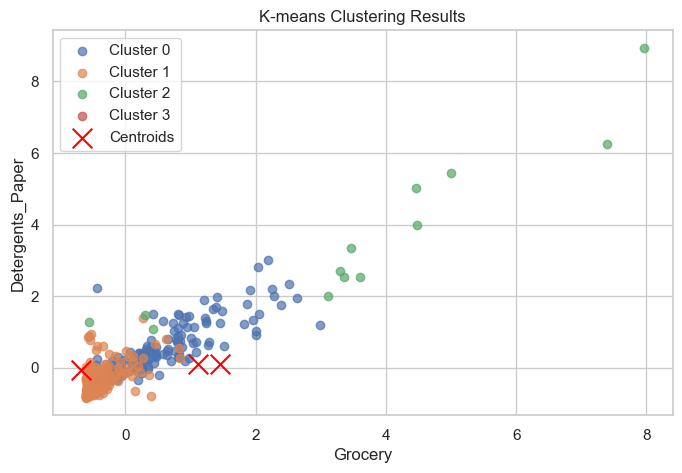

In [56]:
#Visualize the clustered data
plt.figure(figsize=(8, 5))
for cluster_num in range(4):
    cluster_points = scaled_data[scaled_data['Cluster'] == cluster_num]
    plt.scatter(cluster_points['Detergents_Paper'], cluster_points['Grocery'], label=f'Cluster {cluster_num}', alpha=0.7)

# Plot centroids (optional)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroids')

plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()

Looks like 3 clusters are more prominent, Try 3 instead of 4 to see 

In [57]:
#finish off example by actually performing clustering
model = KMeans(n_clusters=3)
model.fit(scaled_data)  #Train the model

pred = model.predict(scaled_data)  #Make predictions

pred



array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [58]:
scaled_data['pred'] = pred
print(scaled_data)

      Channel    Region     Fresh      Milk   Grocery    Frozen  \
0    1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1    1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2    1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3   -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4    1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   
..        ...       ...       ...       ...       ...       ...   
435 -0.690297  0.590668  1.401312  0.848446  0.850760  2.075222   
436 -0.690297  0.590668  2.155293 -0.592142 -0.757165  0.296561   
437  1.448652  0.590668  0.200326  1.314671  2.348386 -0.543380   
438 -0.690297  0.590668 -0.135384 -0.517536 -0.602514 -0.419441   
439 -0.690297  0.590668 -0.729307 -0.555924 -0.573227 -0.620094   

     Detergents_Paper  Delicassen  Cluster  pred  
0           -0.043569   -0.066339        0     1  
1            0.086407    0.089151        0     1  
2            0.133232    2.243293        0

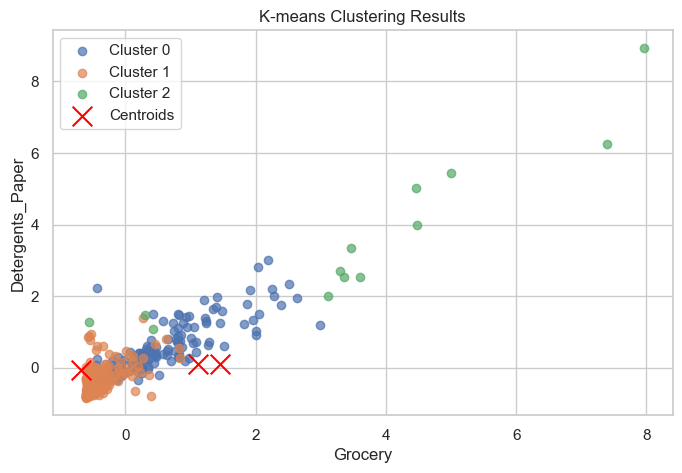

In [60]:
#Visualize the clustered data
plt.figure(figsize=(8, 5))
for cluster_num in range(3):
    cluster_points = scaled_data[scaled_data['Cluster'] == cluster_num]
    plt.scatter(cluster_points['Detergents_Paper'], cluster_points['Grocery'], label=f'Cluster {cluster_num}', alpha=0.7)

# Plot centroids (optional)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroids')

plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()

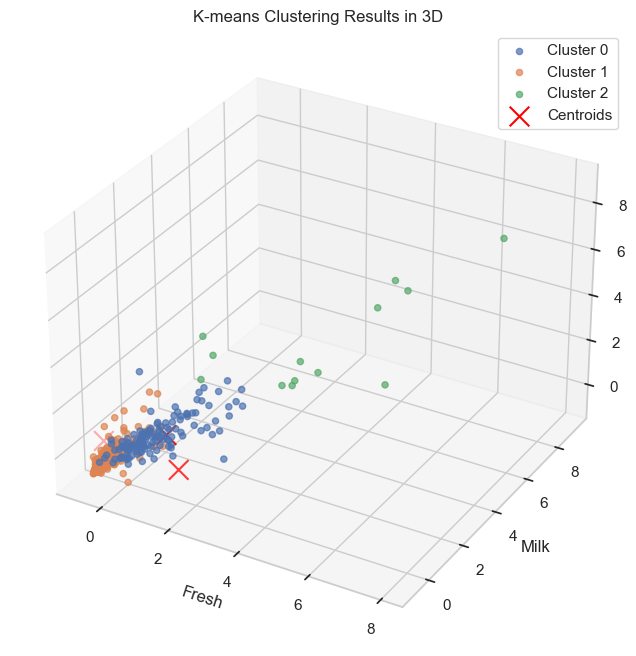

In [63]:

from mpl_toolkits.mplot3d import Axes3D

# Visualize the clustered data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_num in range(3):
    cluster_points = scaled_data[scaled_data['Cluster'] == cluster_num]
    ax.scatter(cluster_points['Detergents_Paper'], cluster_points['Milk'], cluster_points['Grocery'],
               label=f'Cluster {cluster_num}', alpha=0.7)

# Plot centroids (optional)
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='red', s=200, label='Centroids')

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')
ax.set_title('K-means Clustering Results in 3D')
ax.legend()
plt.show()


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [69]:
scaled_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,pred
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0,1
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0,1
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0,1
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1,0
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0,1
...,...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1,0
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1,0
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0,1
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Sample data (Replace this with your dataset)
data = {
    'Fresh': [2000, 1500, 1000, 3000, 1800],
    'Milk': [1000, 2000, 3000, 1200, 500],
    'Grocery': [500, 1000, 1500, 2000, 2500],
    'Frozen': [800, 1000, 1200, 500, 900],
    'Detergents_Paper': [100, 200, 300, 150, 400],
    'Delicassen': [300, 400, 200, 100, 600]
}

scaled_data = pd.DataFrame(data)

# Step 1: Data Preprocessing - Standardize the data (if not already done)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(scaled_data)

# Step 2: Calculate Distance Matrix - Using Euclidean distance
distance_matrix = np.linalg.norm(data_scaled[:, np.newaxis] - data_scaled, axis=-1)

# Step 3: Hierarchical Clustering - Using Ward linkage
linkage_matrix = linkage(distance_matrix, method='ward')

# Step 4: Dendrogram Visualization
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=scaled_data.index, orientation='top', leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram of Hierarchical Clustering')
plt.show()

# Step 5: Cut the Dendrogram and Decide on the Number of Clusters
# (Use visual inspection or techniques like the "elbow" method)

# Step 6: Cluster Assignment (Cut the dendrogram and assign data points to clusters)


In [74]:
# Calculate Distance Matrix - Using Euclidean distance
distance_matrix = np.linalg.norm(scaled_data.values[:, np.newaxis] - scaled_data.values, axis=-1)


In [76]:
# Hierarchical clustering under 3 different linkage criterias
# single
single = AgglomerativeClustering(n_clusters=3, linkage="single")
single_pred = single.fit_predict(scaled_data)

# complete
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(scaled_data)

# average
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(scaled_data)

In [77]:
# use the silhouette score instead to judge clustering
single_silhouette = silhouette_score(scaled_data, single_pred)
complete_silhouette = silhouette_score(scaled_data, complete_pred)
avg_silhouette = silhouette_score(scaled_data, avg_pred)

print( "Scores: \nSingle:", single_silhouette,"\nComplete: ", complete_silhouette, "\nAverage: ", avg_silhouette)

Scores: 
Single: 0.7316043992685616 
Complete:  0.6983604853781723 
Average:  0.6622131052815287


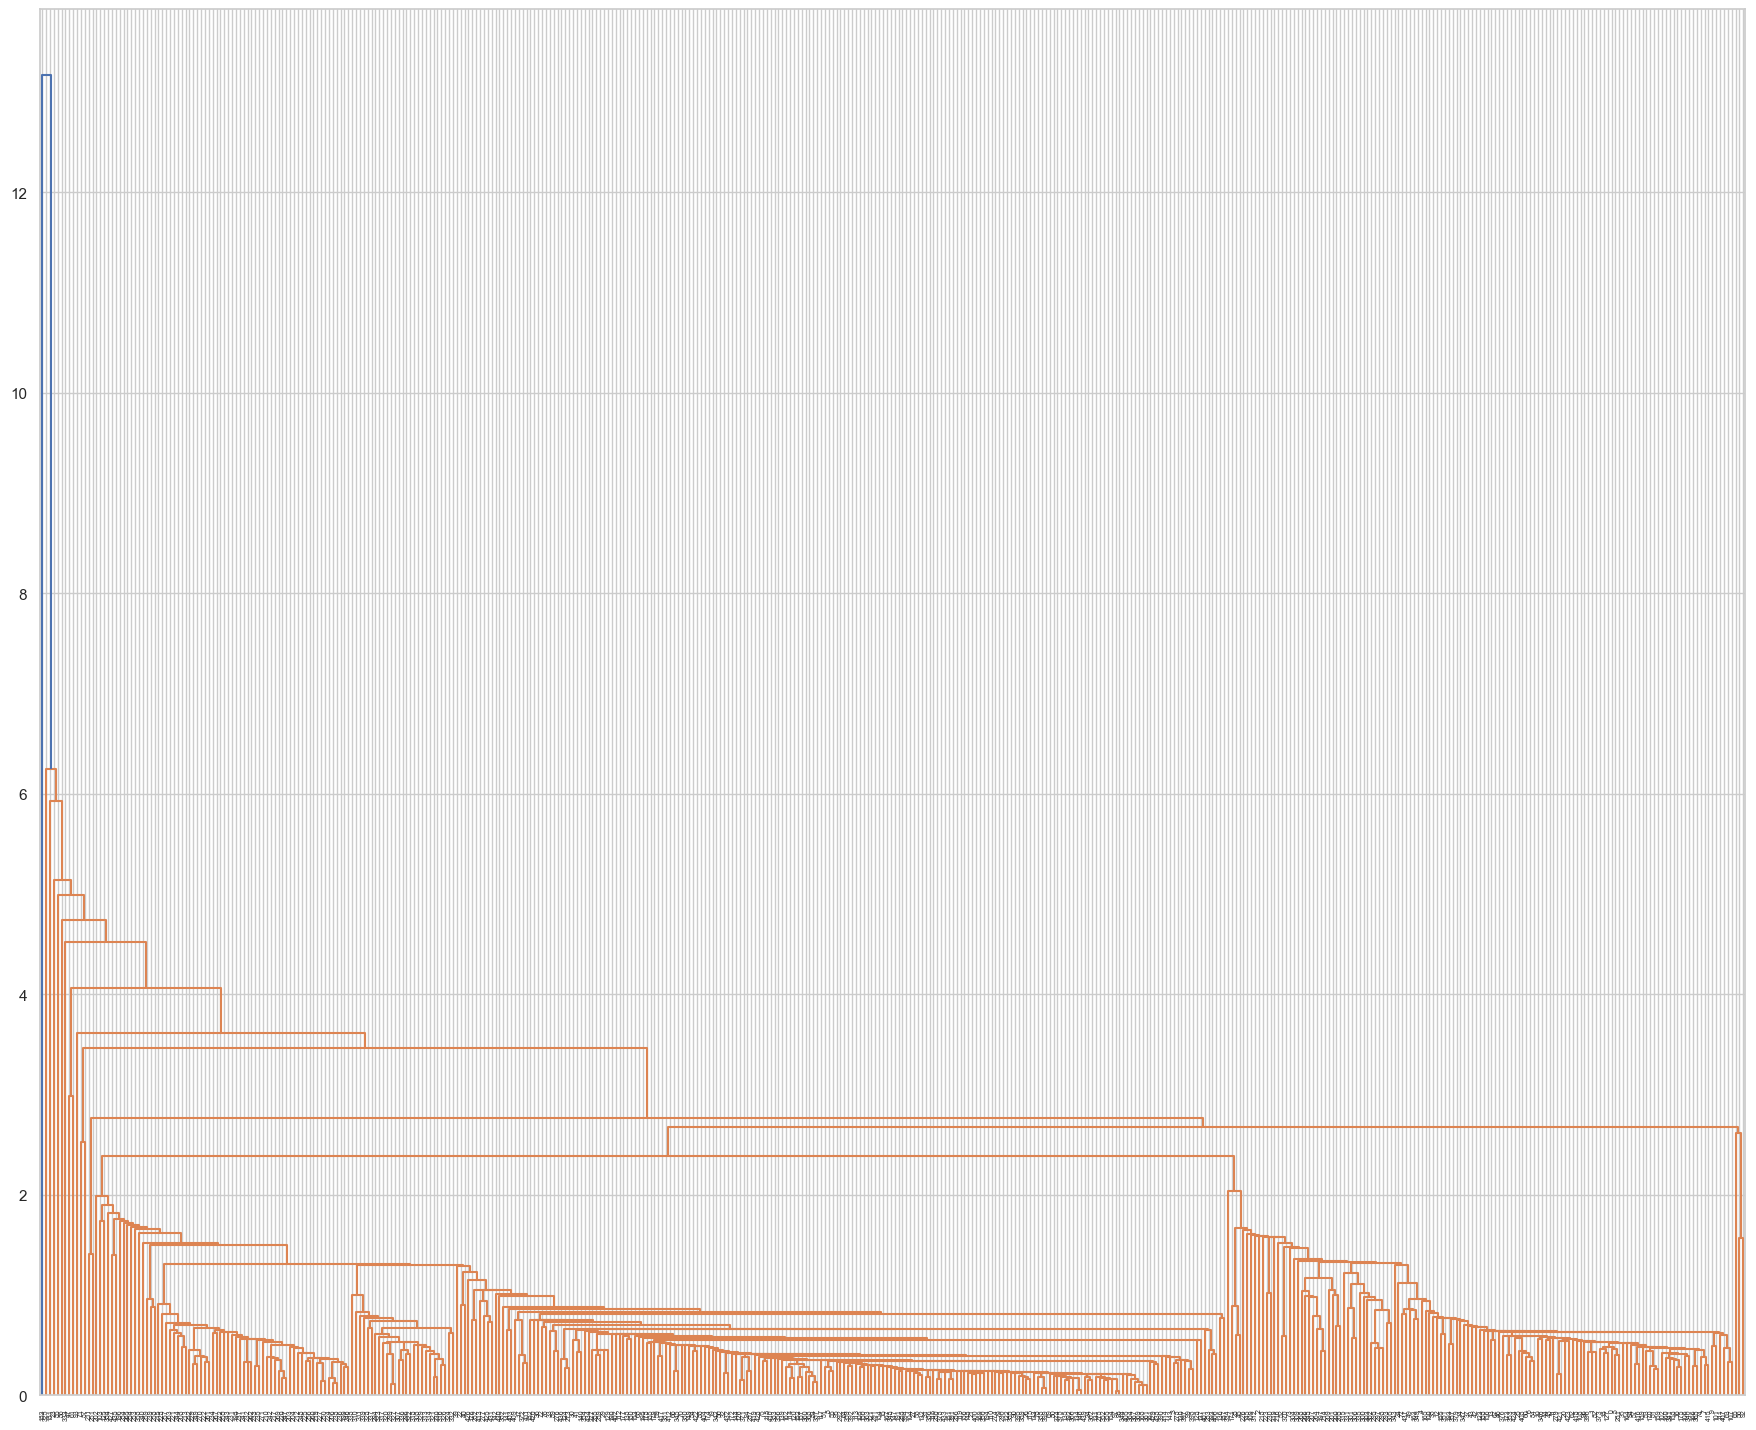

In [80]:
# Specify the linkage type. Scipy accepts 'single', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Rand Score from above
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'single'

linkage_matrix = linkage(scaled_data, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

This look clumsy, perform clustering on a sample of the data

In [82]:

# Choose a random sample of your data
sample_size = 100  
random_sample = scaled_data.sample(n=sample_size, random_state=42)  # Adjust random_state as needed


distance_matrix = np.linalg.norm(random_sample.values[:, np.newaxis] - random_sample.values, axis=-1)


linkage_matrix = linkage(distance_matrix, method='ward')



In [83]:
# Hierarchical clustering under 3 different linkage criterias
# single
single = AgglomerativeClustering(n_clusters=3, linkage="single")
single_pred = single.fit_predict(random_sample)

# complete
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(random_sample)

# average
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(random_sample)

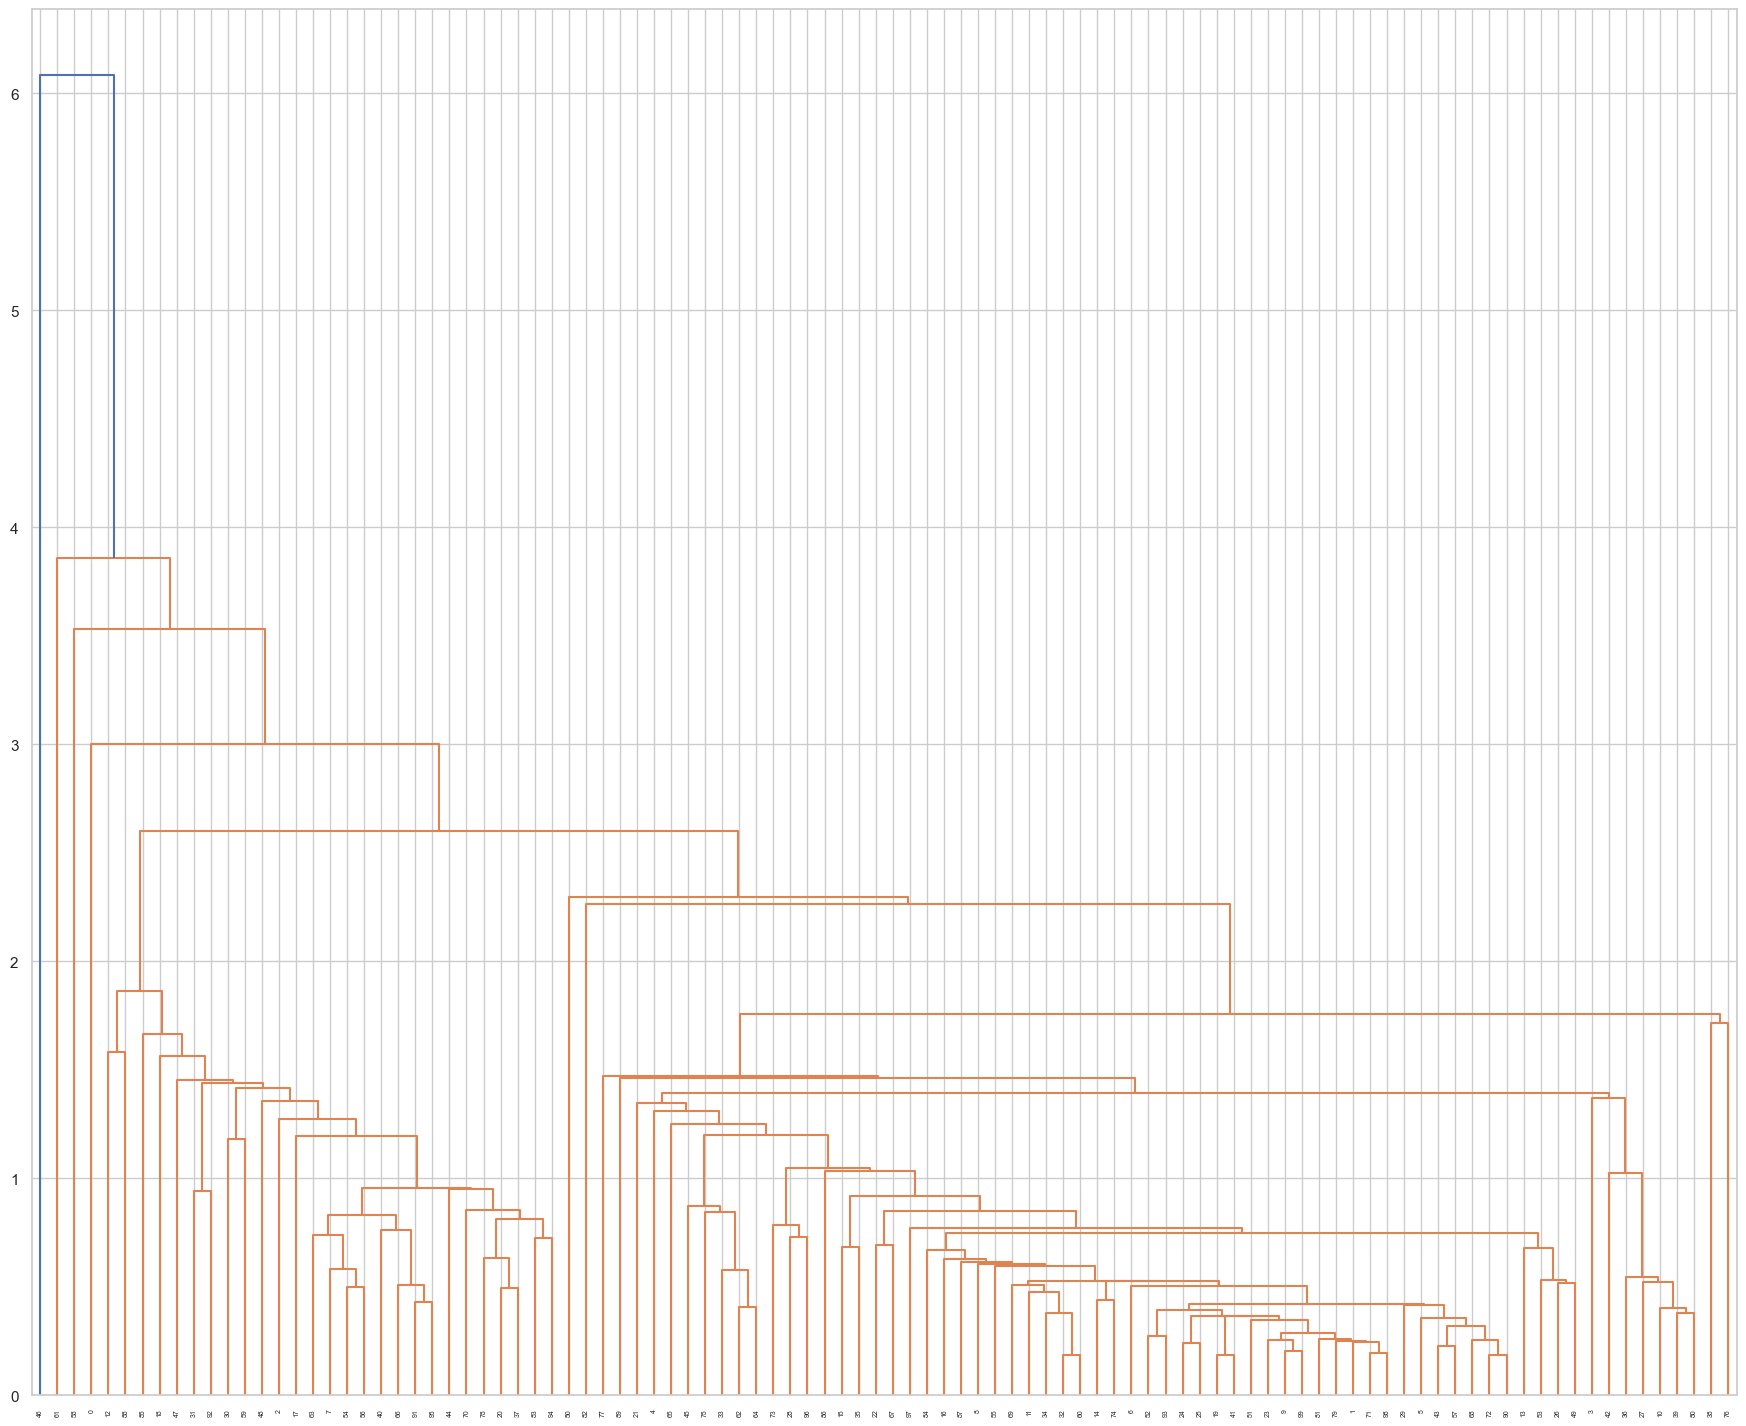

In [88]:
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'single'

linkage_matrix = linkage(random_sample, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

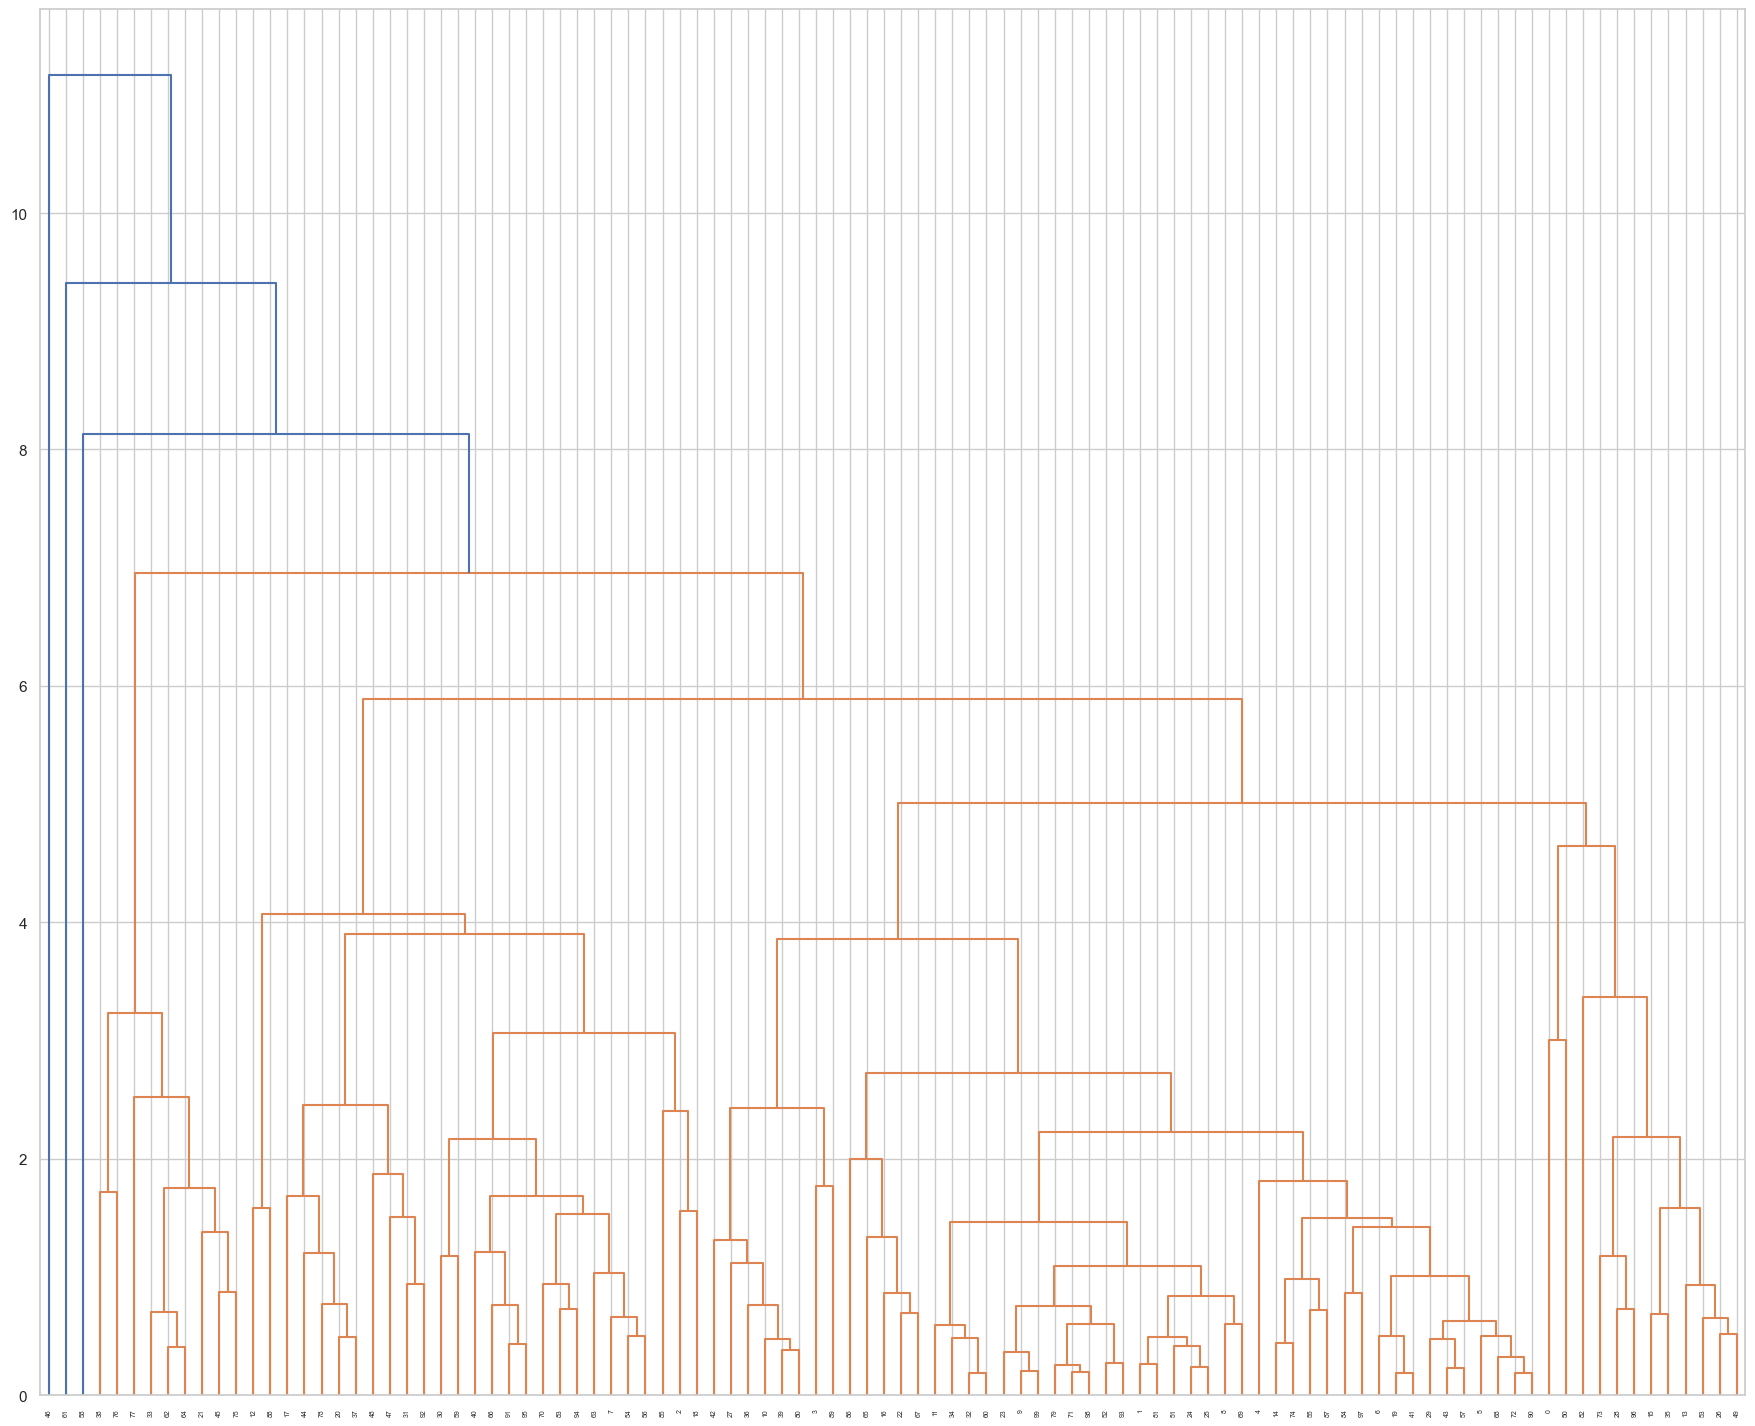

In [85]:
#check for other linkage types
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'complete'

linkage_matrix = linkage(random_sample, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

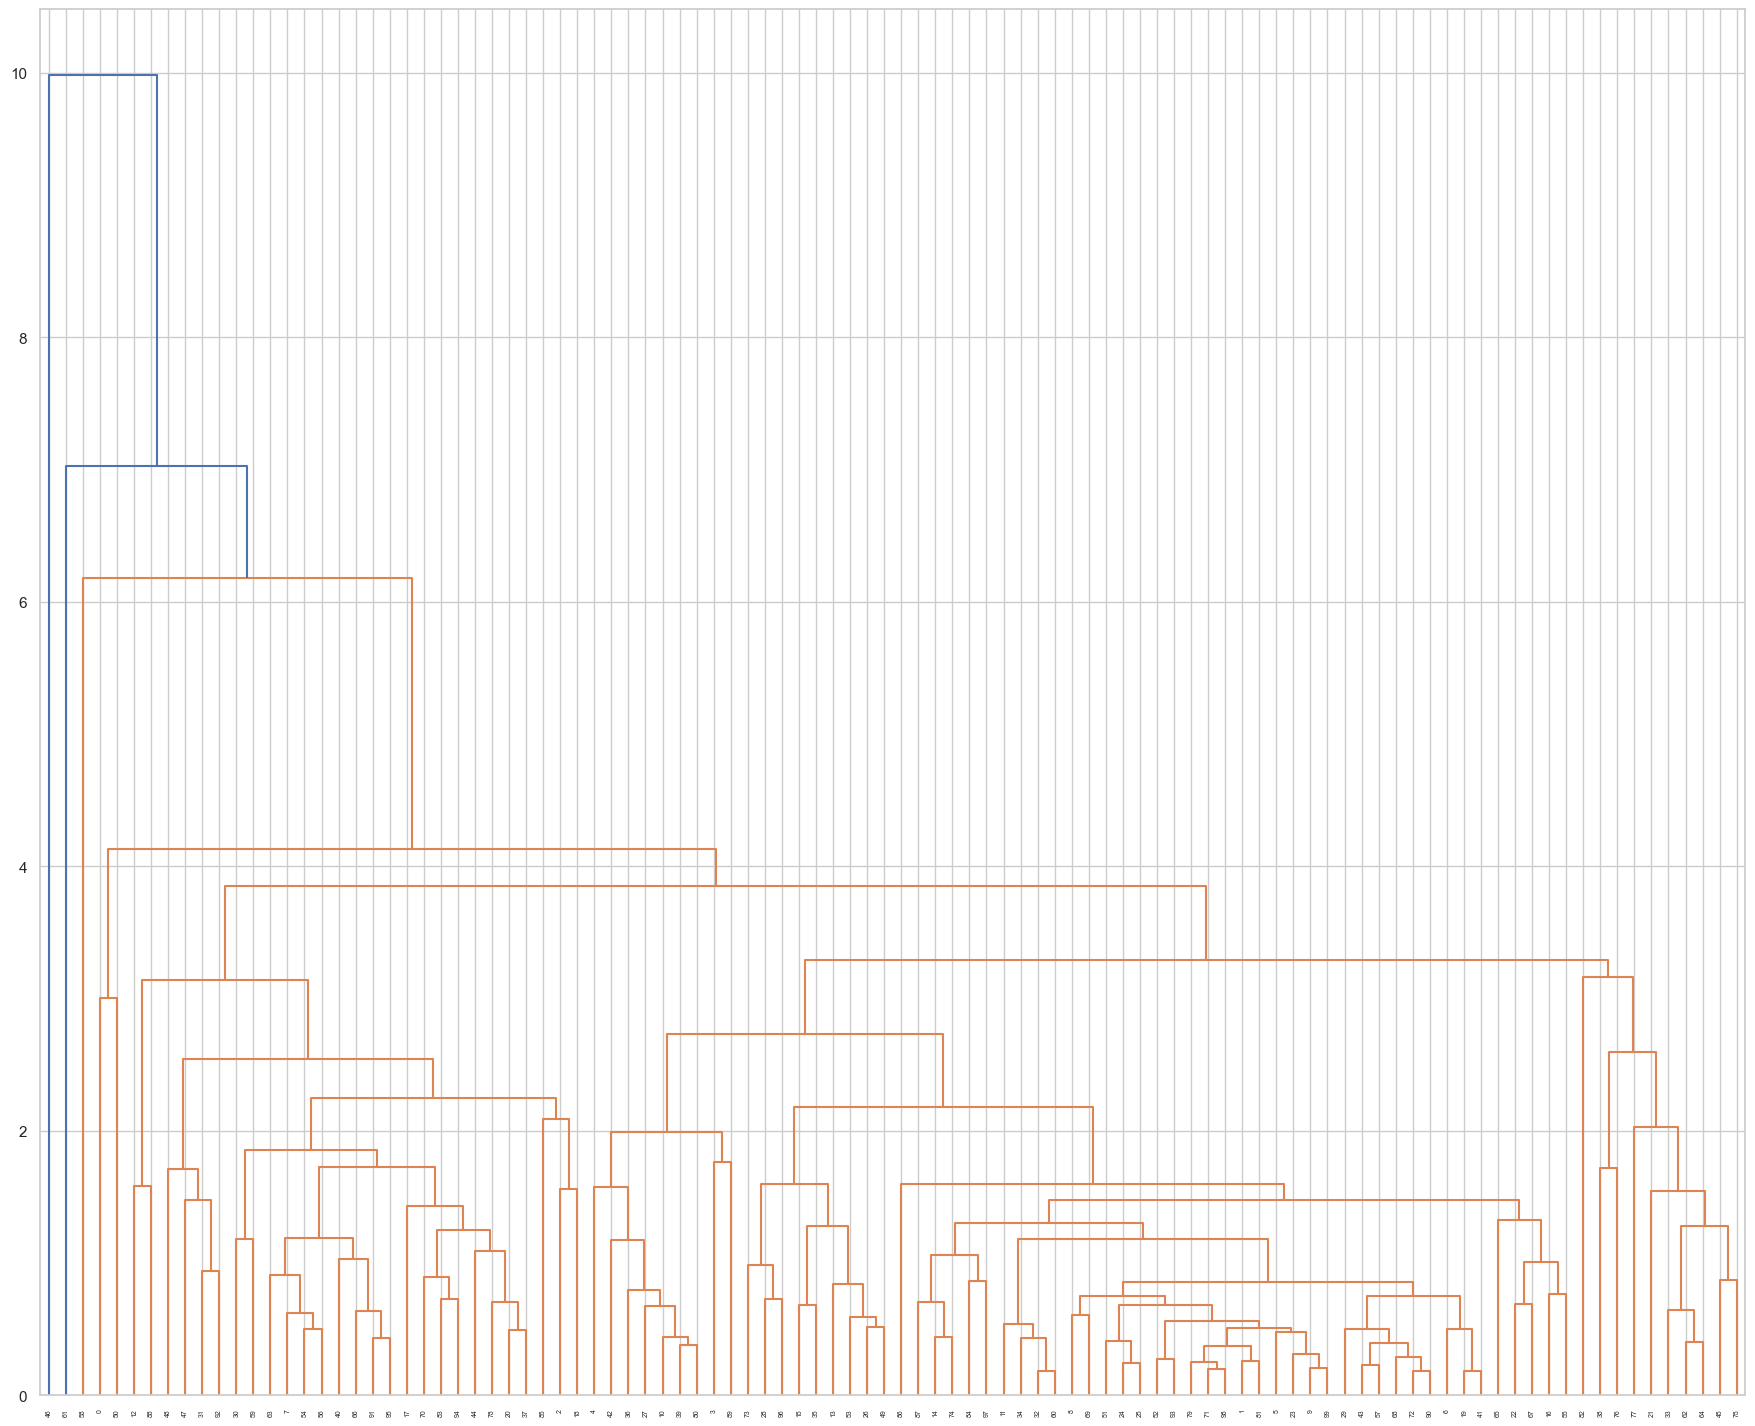

In [86]:
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'average'

linkage_matrix = linkage(random_sample, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

# Part IV - PCA

In [89]:
scaled_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,pred
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0,1
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0,1
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0,1
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1,0
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0,1
...,...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1,0
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1,0
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0,1
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1,0


In [91]:
pca_df = scaled_data.drop(columns=['Cluster', 'pred'])


In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

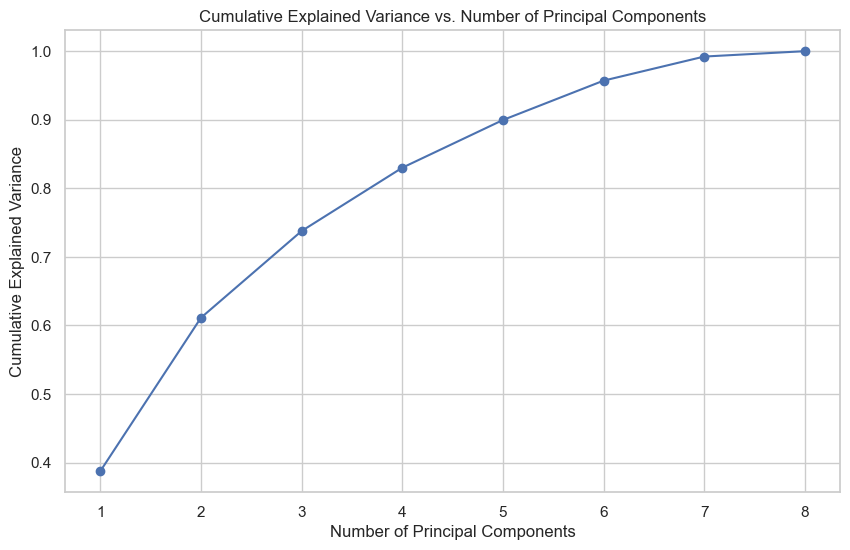

In [92]:
from sklearn.decomposition import PCA

# Assuming you have 'pca_df' containing your data after dropping 'Cluster' and 'pred' columns
# Create an instance of PCA
pca = PCA()

# Fit PCA on your data
pca.fit(pca_df)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

** There is a strong relationship between Grocery and  Detergents_Paper
** the Datasets contains 3 clusters out of which 2 are the most prominent